## Principle Component Analysis (Dimensionality Reduction)

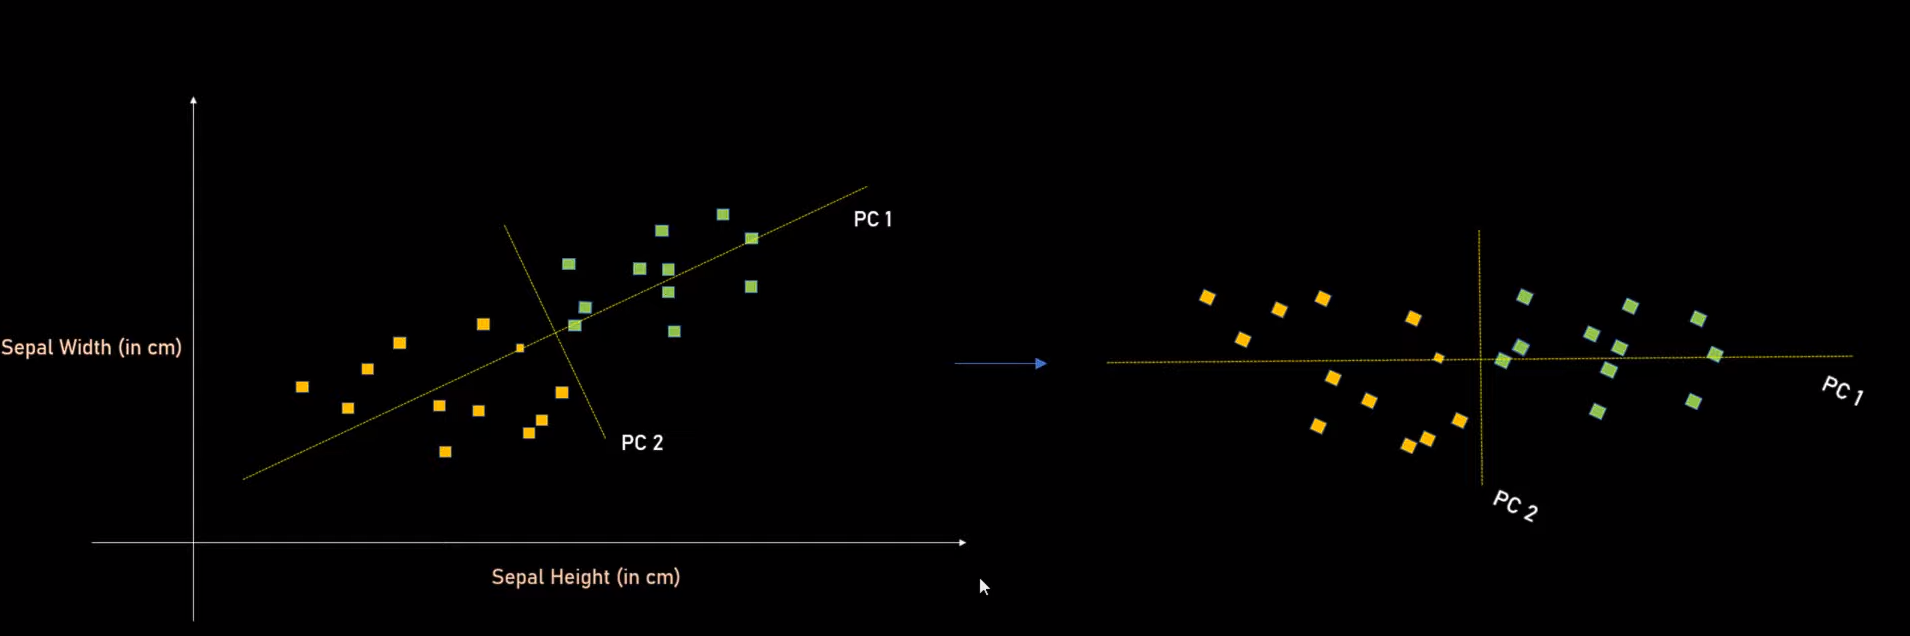

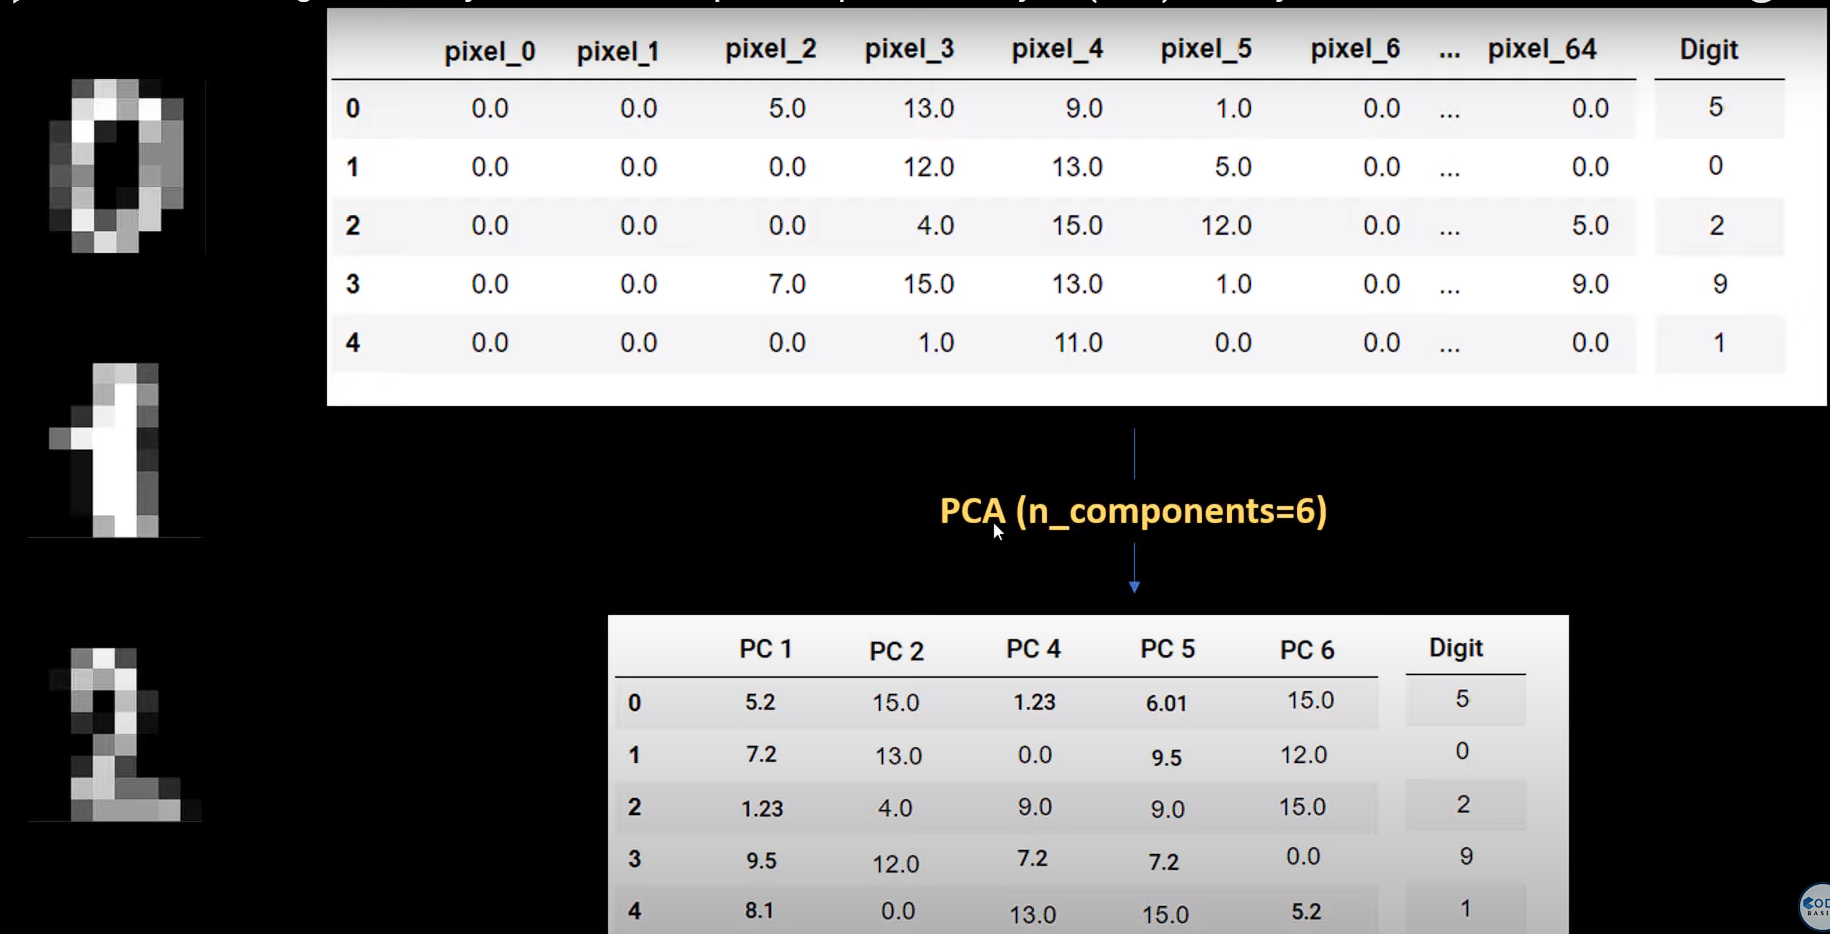

#### Few things to keep in mind before using PCA
- Scale Features before applying PCA
- Accuracy might drop

In [1]:
import pandas as pd
from sklearn.datasets import load_digits

In [2]:
dataset = load_digits()
dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

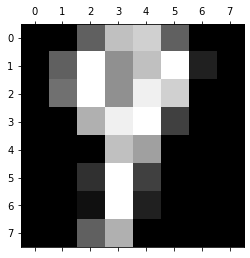

In [3]:
import matplotlib.pyplot as plt
import numpy as np
plt.matshow(dataset.data[69].reshape(8, 8))
plt.gray()

In [4]:
df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
X = df.copy()
y = dataset.target

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 30)

In [7]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9722222222222222

In [17]:
from sklearn.decomposition import PCA

pca = PCA(0.98) #retain 95% of the features or variance
X_pca = pca.fit_transform(X_scaled)
X_pca.shape

(1797, 49)

In [18]:
pca.explained_variance_ratio_

array([0.12033916, 0.09561054, 0.08444415, 0.06498408, 0.04860155,
       0.0421412 , 0.03942083, 0.03389381, 0.02998221, 0.02932003,
       0.02781805, 0.02577055, 0.02275303, 0.0222718 , 0.02165229,
       0.01914167, 0.01775547, 0.01638069, 0.0159646 , 0.01489191,
       0.0134797 , 0.01271931, 0.01165837, 0.01057647, 0.00975316,
       0.00944559, 0.00863014, 0.00836643, 0.00797693, 0.00746471,
       0.00725582, 0.00691911, 0.00653909, 0.00640793, 0.00591384,
       0.00571162, 0.00523637, 0.00481808, 0.00453719, 0.00423163,
       0.00406053, 0.00397085, 0.00356493, 0.00340787, 0.00327835,
       0.00311032, 0.00288575, 0.00276489, 0.00259175])

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.2, random_state = 30)

import warnings
warnings.filterwarnings("ignore")

model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9722222222222222